STAT 2255: Homework 07
======================



## Problem 1 (40 pts):PROPERTIES:



The file "`Game_of_Thrones_Script.csv`" contains line script for
characters across 8 seasons. Use this file, answer the following
question. You may need to set `keep_default_na=False` when loading the data,
e.g., 



In [2]:
import pandas as pd
pd.read_csv("Game_of_Thrones_Script.csv", keep_default_na=False)

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011/4/17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011/4/17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011/4/17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
23906,2019/5/19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019/5/19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019/5/19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019/5/19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


### part (a) - 5 pts:PROPERTIES:



How many characters are there across all 8 seasons?



In [3]:
import pandas as pd
df1 = pd.read_csv("Game_of_Thrones_Script.csv", keep_default_na=False)

### part (b) - 5 pts:PROPERTIES:



How many characters are there in each season?

**Note:** These numbers do not have to add to the number you get in part
(a).



In [4]:
g = df1.groupby('Season')
ncs = g.apply(lambda x: x['Name'].nunique())

### part (c) - 5 pts:PROPERTIES:



Which episode has the least number of characters?



In [5]:
ncs.idxmin()
ncs.min()

65

### part (d) - 5 pts:PROPERTIES:



which episode has the most line of sentences in total?



In [6]:
ge = df1.groupby('Episode')
n_lines = ge.apply(lambda x: x['Sentence'].shape[0])
n_lines.idxmax()

'Episode 5'

### part (e) - 5 pts:PROPERTIES:



Across all 8 seasons, list the top 5 charaters who had the most
sentences and how many sentences they have said.



In [7]:
gn = df1.groupby('Name')
n_lines = gn.apply(lambda x: x['Sentence'].shape[0])
a = n_lines.nlargest(5)
a.index
a.values

array([1760, 1133, 1048, 1005,  945])

### part (f) - 5 pts:PROPERTIES:



For season 3, list the top 5 charaters who had the most
sentences and how many sentences they have said.



In [8]:
gn = df1[df1['Season'] == 'Season 3'].groupby('Name')
n_lines = gn.apply(lambda x: x['Sentence'].shape[0])
n_lines.nlargest(5)

Name
tyrion lannister      241
jaime lannister       129
daenerys targaryen    117
arya stark            104
robb stark             99
dtype: int64

### part (g) - 5 pts:PROPERTIES:



Based on the **Sentence** column, create a new column called `num_words`
which gives the total number of words in the sentence.



In [9]:
df1['num_words'] = df1['Sentence'].apply(lambda x: len(x.split()))

### part (h) - 5 pts:PROPERTIES:



For numeric variables, we can use some quantities to summarize. For this
part, first split the data based on season. Then, for variable
`num_words`, calculate

-   minimum
-   mean
-   median
-   maximum
-   summation

What can you tell based on your results?



In [10]:
g['num_words'].agg(['min','mean','median', 'max', 'sum'])

,min,mean,median,max,sum
Season,,,,,
Season 1,1,11.867568,8.0,256,37727
Season 2,1,11.989525,8.0,332,46927
Season 3,1,11.781976,8.0,293,42097
Season 4,1,12.035403,7.0,233,41474
Season 5,1,12.381219,8.0,219,37577
Season 6,1,12.747899,8.0,192,36408
Season 7,1,13.232596,9.0,163,32314
Season 8,1,9.216235,6.0,102,13511


## Problem 2 (30 pts):PROPERTIES:



For this problem, you are given 3 data files

-   purchases: contains purchases record March 2019 - June 2019.
-   customers: contains information about customers.
-   products: contains information about products.

First, import all 3 data files.

**Note**: When importing customers.csv and products.csv, you may want to
set `index_col="customer_id"` and `index_col="product_id"`.



### part (a) - 10 pts:PROPERTIES:



Using purchases as the left table, use left join to join **purchases** and
**customers** together. In this case, since both tables contain column
`customer_id`, so this column can be used as key for the joining.
To do this, you need to set `on='customer_id'` in the `join` method. Name this
joined table as **purchase1**.

Using DataFrame **purchases1**, find the frequency of purchases for different gender group. 



In [11]:
purchases = pd.read_csv("purchases.csv")
customers = pd.read_csv("customers.csv", index_col="customer_id")
products = pd.read_csv("products.csv", index_col="product_id")
purchase1 = purchases.join(customers, on='customer_id')
purchase1.groupby('gender').apply(lambda x: x['id'].count())

gender
Female    2779
Male      2954
dtype: int64

### part (b) - 10 pts:PROPERTIES:



Using purchases1 as the left table, use left join to join **purchases1**
and **products** together. In this case, since both tables contain column
`product_id`, so this column can be used as key for the joining. To do
this, you need to set `on='product_id'` in the `join` method. Name this
joined table as **purchase2**.

List the top 5 best selling products (based on the **amount** sold).



In [12]:
purchase2 = purchase1.join(products, on='product_id')
purchase2['product'].loc[purchase2['amount'].nlargest(5).index]

10             Tobasco Sauce
11               Fuji Apples
37               Fuji Apples
58        Sauce - Demi Glace
72    Cookies Oatmeal Raisin
Name: product, dtype: object

### part (c) -10 pts:PROPERTIES:



Repeat part b for each gender group: What are the top 5 best selling
products for male and female group?

**Note**: One possible way to do this is to first create two new
DataFrames for each gender. Then repeat what you did in part b.



In [13]:
purchase_m = purchase2.loc[purchase2['gender']=='Male']
purchase_f = purchase2.loc[purchase2['gender']=='Female']
print(purchase_m['product'].loc[purchase_m['amount'].nlargest(5).index])
print(purchase_f['product'].loc[purchase_f['amount'].nlargest(5).index])

10              Tobasco Sauce
11                Fuji Apples
72     Cookies Oatmeal Raisin
80       Lettuce - Spring Mix
125      Sambuca - Ramazzotti
Name: product, dtype: object
58              Sauce - Demi Glace
92     Lettuce - Baby Salad Greens
98      Pie Box - Cello Window 2.5
193            Muffin Hinge - 211n
342                 Onions - White
Name: product, dtype: object


## Problem 3 (20 pts):PROPERTIES:



The file "`Kobe_data.csv`" contains shot records of NBA basketball player
Kobe Bryant for his career. Below, is a function that plot all the shots
made by Kobe. The graph is just to illustrate the flexibility of
matplotlib.



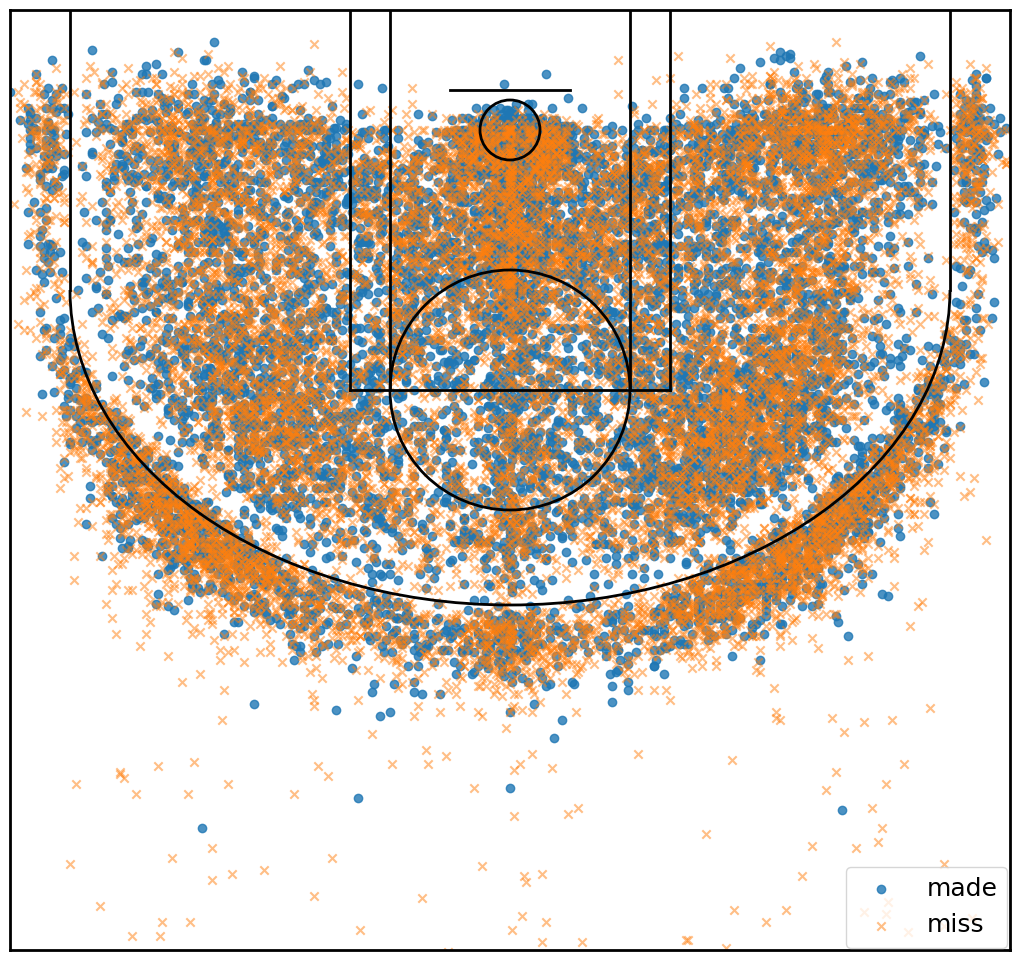

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
kobe = pd.read_csv('kobe_data.csv')
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(470, 0)

# General plot parameters
# mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(10, 9.4))
ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(kobe[kobe.shot_made_flag == 1]['loc_x'], kobe[kobe.shot_made_flag == 1]['loc_y'] + 60, alpha = 0.8, label = 'made')
plt.scatter(kobe[kobe.shot_made_flag == 0]['loc_x'], kobe[kobe.shot_made_flag == 0]['loc_y'] + 60, marker='x', alpha=0.5, label = 'miss')
ax = create_court(ax, 'black')
fig.legend(loc = 'lower right')

![img](output_31_2.png "png")



### Part (a) - 10 pts:PROPERTIES:



Create a **relative** frequency table using `combined_shot_type` and
`shot_zone_range` and set `margins=True`.



In [15]:
a = pd.crosstab(kobe.combined_shot_type, kobe.shot_zone_range, margins=True)

### part (b) - 5 pts:PROPERTIES:



As we talked during the class, this relative frequency table give the
empirical probabilities associated with different categories. Based on
the table, what is kobe's most commonly used shoting type?



In [16]:
a['All'].iloc[1:6].idxmax()

'Jump Shot'

### part (c) - 5 pts:PROPERTIES:



Given a shot is made less than 8ft, what is kobe's most commonly used
shoting type? What is the empirical conditional probability here?

**Hint**:

Conditional probability of A given B can be calculated by:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$



In [17]:
print(a['Less Than 8 ft.'].iloc[1:6].idxmax())
print(a['Less Than 8 ft.'].iloc[1:6].max() / a['Less Than 8 ft.'].loc['All'])

Layup
0.5790593743349649
